In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# reading data

In [36]:
df = pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# converting object columns to category columns

In [37]:
df["species"] = df["species"].astype("category")

# data information befor cleaning

In [38]:
pd.DataFrame({"Null Data":df.isna().sum(),
              "Data types":df.dtypes,
              "Uniqe Data":df.nunique(),
             "Duplicates":df.duplicated().sum()}).T

,sepal_length,sepal_width,petal_length,petal_width,species
Null Data,0,0,0,0,0
Data types,float64,float64,float64,float64,category
Uniqe Data,35,23,43,22,3
Duplicates,3,3,3,3,3


# Dropping Duplicates

In [39]:
df = df.drop_duplicates()

In [40]:
pd.DataFrame({"Null Data":df.isna().sum(),
              "Data types":df.dtypes,
              "Uniqe Data":df.nunique(),
             "Duplicates":df.duplicated().sum()}).T

,sepal_length,sepal_width,petal_length,petal_width,species
Null Data,0,0,0,0,0
Data types,float64,float64,float64,float64,category
Uniqe Data,35,23,43,22,3
Duplicates,0,0,0,0,0


# data vizulaization 

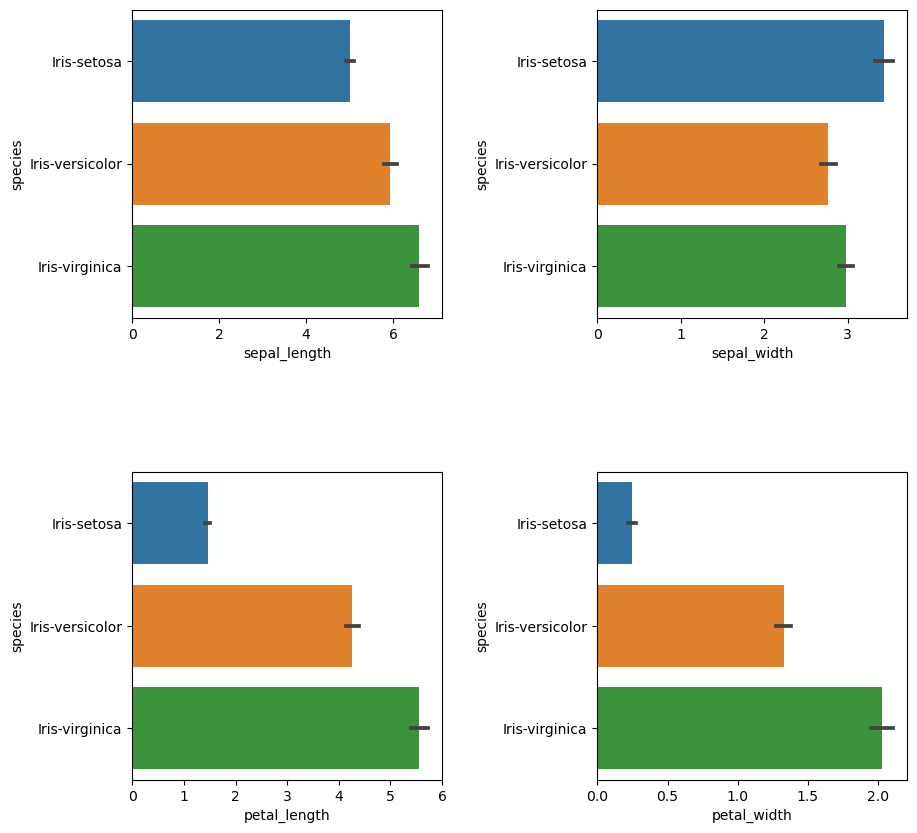

In [41]:
cols = "sepal_length sepal_width petal_length petal_width".split()
plt.figure(figsize=(10,10))
for ind , col in enumerate(df[cols]):
    plt.subplot(2,2,ind+1)
    sns.barplot(x=col , y="species" , data=df)
plt.subplots_adjust(hspace=.5,wspace=.5)
plt.show()

# spliting data

In [69]:
from sklearn.model_selection import train_test_split

X , y = df.iloc[:,:-1] , df.iloc[:,-1:]
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=.2 , shuffle=True, random_state=42)
X_train , X_val , y_train , y_val = train_test_split(X_train,y_train , test_size=.2 , shuffle=True, random_state=42)

# Normalization

In [70]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()

X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)
X_val = X_scaler.transform(X_val)

# Encoding Targit

In [71]:
from sklearn.preprocessing import LabelEncoder
y_encoder = LabelEncoder()
y_train = y_encoder.fit_transform(y_train)
y_val = y_encoder.transform(y_val)
y_test = y_encoder.transform(y_test)

C:\Users\mahmo\anaconda3\envs\storm\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahmo\anaconda3\envs\storm\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\mahmo\anaconda3\envs\storm\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


# KNN model

In [72]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

In [73]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [83]:
from sklearn.metrics import accuracy_score

y_tr_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)


tr_acc = accuracy_score(y_train, y_tr_pred)
val_acc = accuracy_score(y_val, y_val_pred)

print(tr_acc)
print(val_acc)

0.978494623655914
1.0


# fainal test

In [79]:
y_ts_pred = model.predict(X_test)
accuracy_score(y_test, y_ts_pred)

0.9666666666666667